In [18]:
import numpy as np
import pandas as pd
#import torch
#import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sma

Load the hourly and a]daily data for the bicycle use

In [19]:
day_data = pd.read_csv("day.csv")
hour_data = pd.read_csv("hour.csv")

In [20]:
print(day_data.head(5))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [21]:
print(hour_data.head(5))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [22]:
print(hour_data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

Lets plot the histogram of the data

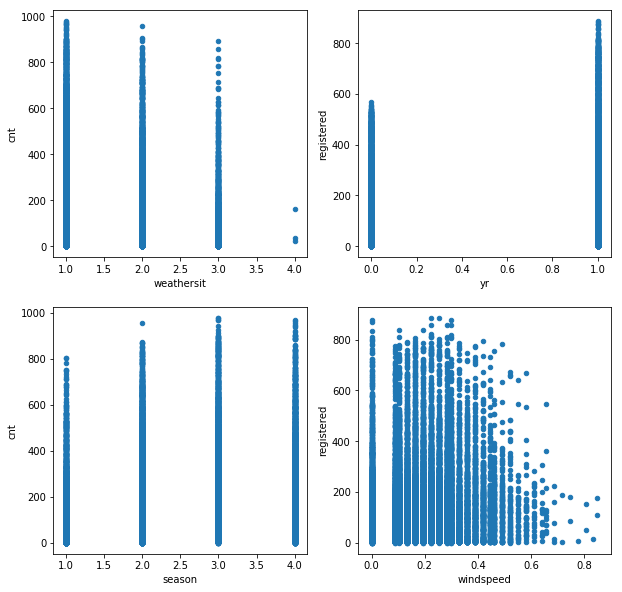

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)
hour_data.plot.scatter("weathersit","cnt",ax = axes[0,0],figsize = (10,10))
hour_data.plot.scatter("yr", "registered", ax = axes[0,1],figsize = (10,10))
hour_data.plot.scatter("season","cnt",ax = axes[1,0],figsize = (10,10))
hour_data.plot.scatter("windspeed","registered", ax= axes[1,1],figsize = (10,10))



In [28]:
correl = hour_data.drop(columns = ["instant","casual","registered","temp","holiday","weekday","workingday","windspeed"]).corr()
correl.style.background_gradient()

,season,yr,mnth,hr,weathersit,atemp,hum,cnt
season,1,-0.0107425,0.830386,-0.0061169,-0.0145236,0.31938,0.150625,0.178056
yr,-0.0107425,1,-0.0104729,-0.003867,-0.0191569,0.0392216,-0.0835464,0.250495
mnth,0.830386,-0.0104729,1,-0.00577191,0.00539952,0.208096,0.164411,0.120638
hr,-0.0061169,-0.003867,-0.00577191,1,-0.0202025,0.13375,-0.276498,0.394071
weathersit,-0.0145236,-0.0191569,0.00539952,-0.0202025,1,-0.105563,0.41813,-0.142426
atemp,0.31938,0.0392216,0.208096,0.13375,-0.105563,1,-0.0519177,0.400929
hum,0.150625,-0.0835464,0.164411,-0.276498,0.41813,-0.0519177,1,-0.322911
cnt,0.178056,0.250495,0.120638,0.394071,-0.142426,0.400929,-0.322911,1


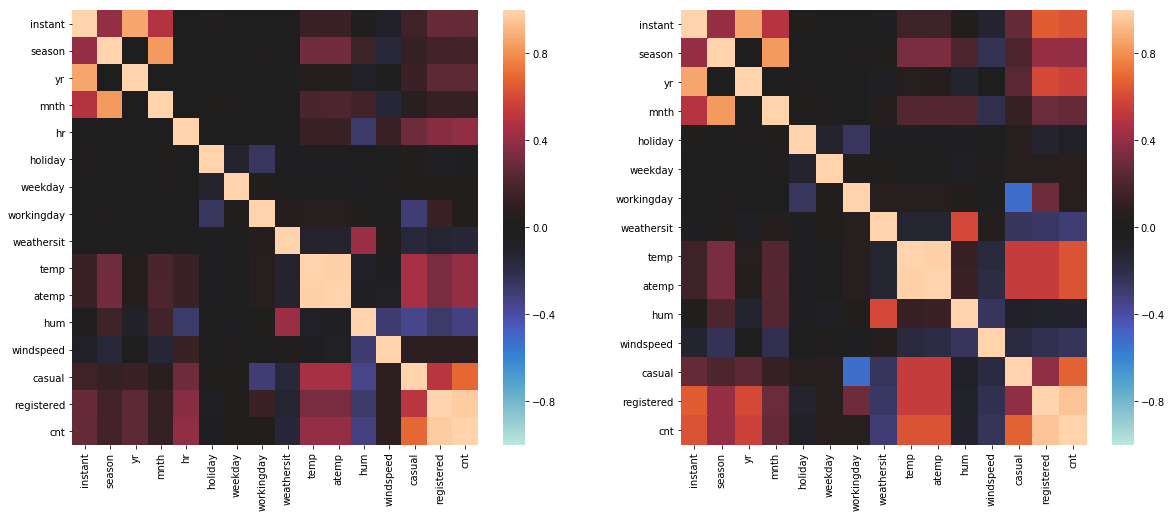

In [53]:
fig, axes  = plt.subplots(ncols=2,figsize=(20,8))
sns.heatmap(hour_data.corr(),vmin=-1,vmax=1,center=0,ax=axes[0])

sns.heatmap(day_data.corr(), vmin=-1, vmax=1, center=0, ax=axes[1])

Lets use the train_test_split() function to split the training data. Common practice is to use 80/20 training and test split. Dataframe $training set$ contains the training data and Dataframe $Validation set$ contains all the validation data set

In [54]:
training_set, Validation_set = train_test_split(hour_data, test_size=0.2)
model = sm.ols('cnt ~ season +windspeed+ atemp + hr +hum+yr', data = training_set).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1453.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:                -88611.
No. Observations:               13903   AIC:                         1.772e+05
Df Residuals:                   13896   BIC:                         1.773e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.8522      7.203     -3.311      0.0

In [55]:
fitted_y = model.fittedvalues
residuals = model.resid

The next step is to plot the residual v/s Fitted value curve. The model which had patterned residual v/s fitted value curve is not considered to be a good model, ie. residuals should be normally distributed without any pattern.

Text(0,0.5,'Residuals')

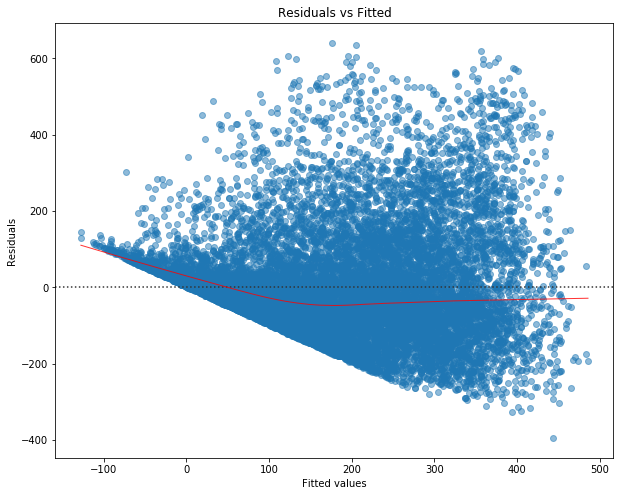

In [33]:
plt_fig = plt.figure()
plt_fig.set_figheight(8)
plt_fig.set_figwidth(10)
plt_fig.axes[0] = sns.residplot(fitted_y, "cnt", data = training_set,lowess=True, scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt_fig.axes[0].set_title('Residuals vs Fitted')
plt_fig.axes[0].set_xlabel('Fitted values')
plt_fig.axes[0].set_ylabel('Residuals')


/home/spandyie/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


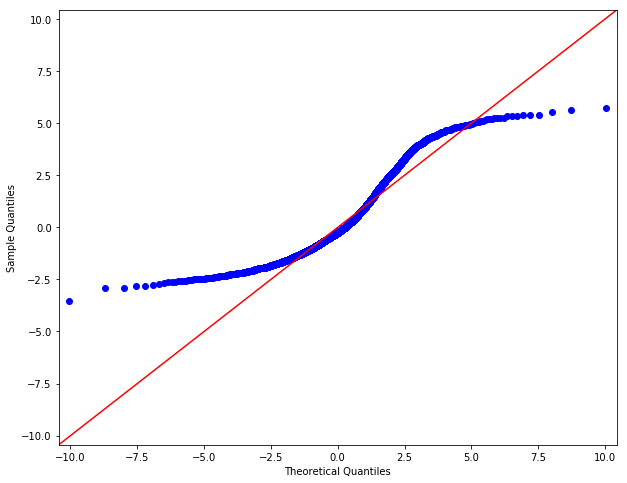

In [35]:
import scipy.stats as stats
plot = sma.qqplot(residuals,stats.t,fit= True,line='45')
plot.set_figheight(8)
plot.set_figwidth(10)
plot.show()